# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $61775.49
The current value of your 5.3 ETH is $18062.44


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
start_day = pd.Timestamp("2018-03-09", tz="America/New_York").isoformat()
today = pd.Timestamp("2022-03-09", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_day,
    end = today
).df
#tried to get around 1000 days of data, however it seems that they only have data since 2021 which is only one year
# Preview DataFrame
df_portfolio

/Users/tarikthomas/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  app.launch_new_instance()


AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2021-10-15 00:00:00-04:00  114.61  114.6300  114.5100  114.56   3829388   
2021-10-18 00:00:00-04:00  114.33  114.5600  114.2500  114.49   5145953   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.18   3999066   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07   5881766   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85   4741154   
...                           ...       ...       ...     ...       ...   
2022-03-03 00:00:00-05:00  109.79  110.0000  109.6500  109.87  14782583   
2022-03-04 00:00:00-05:00  110.40  110.5500  110.2250  110.31   7375935   
2022-03-07 00:00:00-05:00  109.85  110.1400  109.6400  109.68  11739486   
2022-03-08 00:00:00-05:00  109.25  109.3301  109.1201  109.25   8181961   
2022-03-09 00:00:00-05:00  109.10  109.2090  108.9300  109.03   9823305   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2021-10-15 00:00:00-04:00  444.76  446.2600  444.09  445.83   55980388  
2021-10-18 00:00:00-04:00  443.97  447.5500  443.27  447.22   51994387  
2021-10-19 00:00:00-04:00  448.92  450.7000  448.27  450.68   40790864  
2021-10-20 00:00:00-04:00  451.13  452.7320  451.01  452.39   41594298  
2021-10-21 00:00:00-04:00  451.76  453.8290  451.31  453.61   33945007  
...                           ...       ...     ...     ...        ...  
2022-03-03 00:00:00-05:00  440.47  441.1100  433.80  435.72   89909164  
2022-03-04 00:00:00-05:00  431.75  433.3700  427.88  432.22  100199312  
2022-03-07 00:00:00-05:00  431.55  432.3018  419.36  419.45  113647664  
2022-03-08 00:00:00-05:00  419.70  427.2100  415.12  416.31  141591617  
2022-03-09 00:00:00-05:00  425.14  429.5100  422.83  427.43   94224328  

[100 rows x 10 columns]

In [10]:
print(df_portfolio.iloc[-1]['AGG']['close'])

109.03


In [11]:
# Pick AGG and SPY close prices
agg_close_price =df_portfolio.iloc[-1]['AGG']['close']
spy_close_price =df_portfolio.iloc[-1]['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.03
Current SPY closing price: $427.43


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21371.50
The current value of your 200 AGG shares is $21806.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
amount_data ={
    "amount":[my_btc_value+my_eth_value,my_spy_value+my_agg_value]
}
investments = ['crypto','shares']

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=investments)

# Display savings DataFrame
display(df_savings)

,amount
crypto,79837.927488
shares,43177.500000


<AxesSubplot:ylabel='amount'>

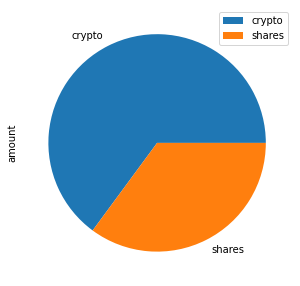

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', figsize=(5, 5))

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.iloc[0] + df_savings.iloc[1])


# Validate saving health
if total_savings > emergency_fund:
    print("congrats on having enough money in your fund")
elif total_savings == emergency_fund:
    print("congrats you are reaching your financial goals")
elif total_savings < emergency_fund:
    print(f" you are ${ emergency_fund - total_savings} from reaching your financial goals")

congrats on having enough money in your fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df
# Display sample data
df_stock_data
#data only starts from 2017


/Users/tarikthomas/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  # This is added back by InteractiveShellApp.init_path()


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-10 00:00:00-04:00  108.60  108.6600  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.5400  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.9400  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.9400  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153.0   
...                           ...       ...       ...      ...        ...   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.650  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.370  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.2000  114.440  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.0900  114.370  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.500  5160765.0   

                              SPY                                         
                             open    high       low    close      volume  
time                                                                      
2017-05-10 00:00:00-04:00     NaN     NaN       NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.1300  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.6700  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.4500  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.6300  240.100  37206183.0  
...                           ...     ...       ...      ...         ...  
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.640  44689009.0  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.480  45962655.0  
2021-04-28 00:00:00-04:00  417.81  419.01  416.9000  417.350  45533863.0  
2021-04-29 00:00:00-04:00  420.33  420.72  416.4400  419.980  70595229.0  
2021-04-30 00:00:00-04:00  417.63  418.54  416.3400  417.300  73129109.0  

[1001 rows x 10 columns]

In [46]:
num_sims =500
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [4/10,6/10],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [47]:
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/tarikthomas/Desktop/python-homework/Unit 5 -Finance Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995050,1.009374,0.992665,1.010032,0.994077,1.016008,1.016431,0.989876,0.996132,0.995087,...,0.992929,0.990845,1.005797,0.999292,0.993784,1.008167,0.990114,0.996870,0.999075,0.997339
2,1.000700,1.010587,1.002430,1.002777,0.993035,1.022329,1.013943,1.002871,1.004148,0.992222,...,0.994481,0.989509,1.002732,0.991456,0.990465,1.011618,0.988953,0.993536,1.001964,0.988074
3,0.992950,1.023377,0.994600,0.997253,0.988694,1.011556,1.014838,1.005766,1.019123,1.011867,...,0.990729,0.999000,0.992723,0.975875,0.989646,1.005172,0.988144,0.990604,1.003892,0.998984
4,0.983177,1.026070,0.984717,0.999436,0.989161,1.018757,1.020516,0.996291,1.016274,1.021841,...,0.987109,0.998822,1.000238,0.980471,1.005861,0.993344,0.995975,0.991108,0.990365,0.985012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.301417,13.193886,23.720100,6.688085,13.078723,14.012416,21.369687,17.032963,39.707861,30.403944,...,9.662499,145.948146,25.384674,26.868600,24.524677,10.737436,6.818293,19.933017,10.369657,7.255448
7557,5.320610,13.242130,23.842415,6.683007,12.983588,14.066863,21.260854,17.136807,39.900889,30.310417,...,9.702849,145.359811,25.266899,26.818962,25.016559,10.736972,6.766194,20.012585,10.331721,7.235612
7558,5.365594,13.238482,24.195194,6.600067,12.980388,13.906572,21.272780,17.210690,39.154012,30.332290,...,9.718350,144.988546,25.340910,26.774563,25.483576,10.745102,6.773714,19.919291,10.254839,7.205915
7559,5.383510,13.276292,24.183399,6.614182,13.017406,13.858981,21.276715,16.877915,39.466892,30.451676,...,9.688264,144.198559,25.431812,26.968245,25.604358,10.715256,6.716230,19.785957,10.241430,7.200901


In [17]:
# Printing the simulation input data


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

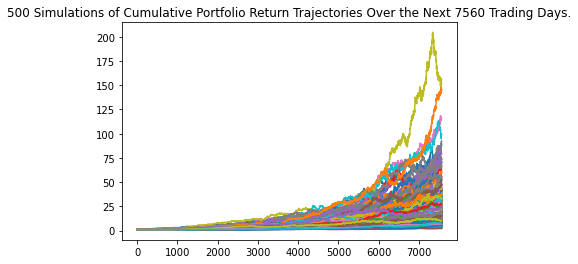

In [49]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

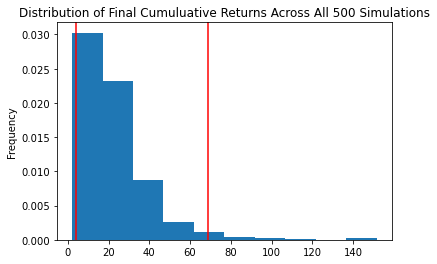

In [51]:
# Plot simulation outcomes
distribution_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_portfolio.summarize_cumulative_return()
print(tbl)

count           500.000000
mean             22.130012
std              16.088798
min               2.342293
25%              10.465170
50%              17.476764
75%              29.550007
max             104.663919
95% CI Lower      4.779747
95% CI Upper     64.053604
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [53]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77901.45 and $1372252.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [55]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $116852.18 and $2058378.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


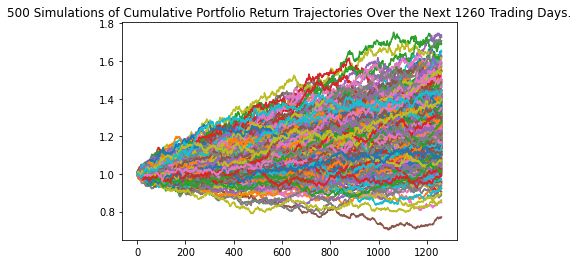

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

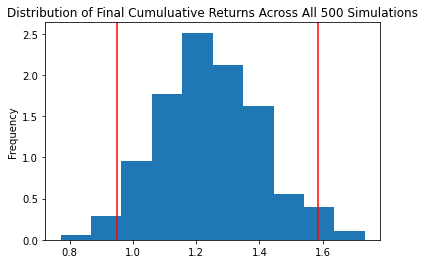

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


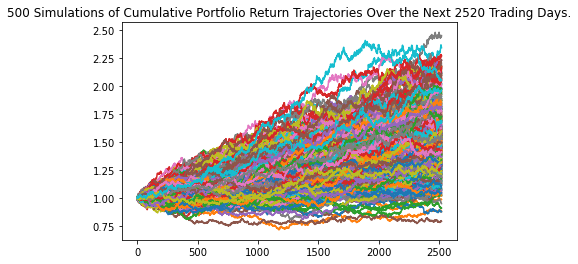

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

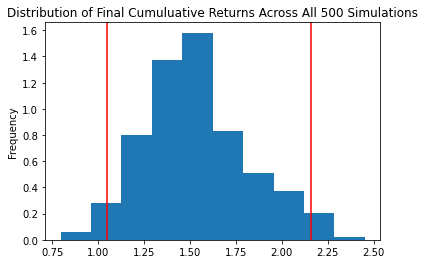

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
